In [53]:
# Import packages
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [54]:
# Import data
def import_data():
    path = 'data/btc_clean.csv'
    df = pd.read_csv(path, parse_dates=['ds'])
    return df.set_index('ds')

In [55]:
# Load dataframe
df = import_data()

In [56]:
# Train/test split sizes
train_size = 0.6
index = round(train_size*df.shape[0])

# Create train/test split dataframes
df_train = df.iloc[:index]
df_test = df.iloc[index:]

In [57]:
# Baseline prediction (next day)
y_pred = df_test.shift(1)

y_pred = df_test.shift(1).dropna()
y_true = df_test[1:]

print(f"R2: {r2_score(y_true, y_pred)}")

R2: 0.9961317068954247


In [58]:
# Linear model with 12 autoregressive features
df2 = df.copy()
df2_train = df_train.copy()
df2_test = df_test.copy()

for i in range(1, 13):
    df2_train[f't - {i}'] = df_train['y'].shift(i)
    df2_test[f't - {i}'] = df_test['y'].shift(i)

df2_train.dropna(inplace=True)
df2_test.dropna(inplace=True)

df2_train.head()

,y,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12
ds,,,,,,,,,,,,,
2015-01-13,267.19,266.34,275.00,293.89,283.93,297.96,288.34,274.84,264.55,279.88,315.42,314.54,321.00
2015-01-14,225.73,267.19,266.34,275.00,293.89,283.93,297.96,288.34,274.84,264.55,279.88,315.42,314.54
2015-01-15,171.13,225.73,267.19,266.34,275.00,293.89,283.93,297.96,288.34,274.84,264.55,279.88,315.42
2015-01-16,210.65,171.13,225.73,267.19,266.34,275.00,293.89,283.93,297.96,288.34,274.84,264.55,279.88
2015-01-17,208.02,210.65,171.13,225.73,267.19,266.34,275.00,293.89,283.93,297.96,288.34,274.84,264.55


In [59]:
# Train/test split
X2_train = df2_train.drop(columns=['y'])
y2_train = df2_train['y']
X2_test = df2_test.drop(columns=['y'])
y2_test = df2_test['y']

print(X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape)

(1522, 12) (1522,) (1011, 12) (1011,)


R2:  0.9958683977454512


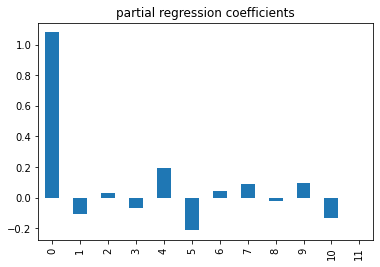

In [60]:
# Predict and measure R2
model = LinearRegression()
model = model.fit(X2_train, y2_train)

print('R2: ', r2_score(y2_test, model.predict(X2_test)))
pd.Series(model.coef_).plot(kind='bar')
plt.title('partial regression coefficients');